# Seaborn

* Seaborn is a Python data visualization library built on top of Matplotlib. It provides a
high-level interface for creating beautiful and statistical visualizations easily. Seaborn
supports many statistical plots (like regression plots, boxplots, violin plots, pair plots, and
heatmaps) that are not directly supported or are harder to make in Matplotlib.


# Two Types Of Plots:
1. Figure-level plots → control the entire figure (the full window or canvas)
2. Axes-level plots → control one specific chart (axes) inside the figure.

# Main Classification of Graph
* Relational Plot
* Distribution Plot
* Catagorical Plot
* Multiplot

### 1.Realtional Plot:

* Visualize statistical Replationships Between two or more Variable.
* Provide bi-Variate analysis

A relational plot is used to visualize statistical relationships between two or more
variables, especially numerical variables. It prvides bi-variate analysis which helps us
understand how one variable changes with another.
* scatterplot
* lineplot

### Figure Leve Function ----> relplot

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [2]:
tips=sns.load_dataset('tips')


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

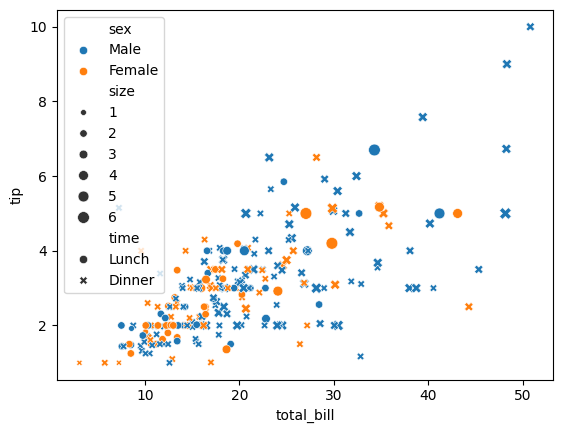

In [5]:
# 1. scatter plot -> axes level function

#hue ----> create difference between categries
# style ----> change marker shape for different categories
#size ---> changes marker size based on another variables value.

sns.scatterplot(data=tips, x='total_bill', y='tip',hue='sex',style='time',size='size')

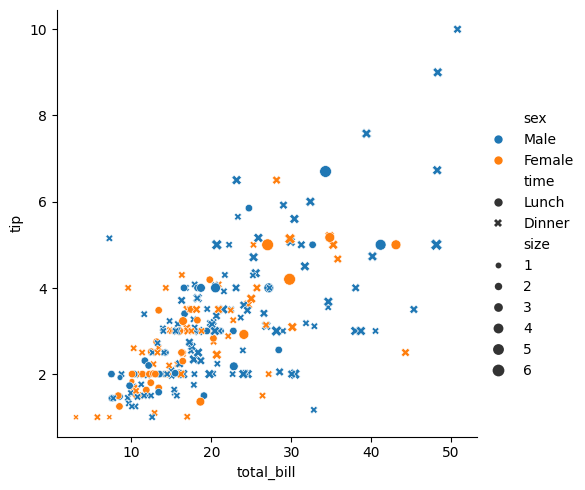

In [7]:
# scatter plot using relplot -> figure level
sns.relplot(data=tips, x='total_bill', y='tip', kind='scatter',hue='sex',style='time',size='size')



In [8]:
gap=px.data.gapminder()
gap.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [9]:
# 2. line plot

temp_df=gap[gap['country']=='Pakistan']
temp_df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1164,Pakistan,Asia,1952,43.436,41346560,684.597144,PAK,586
1165,Pakistan,Asia,1957,45.557,46679944,747.083529,PAK,586
1166,Pakistan,Asia,1962,47.670,53100671,803.342742,PAK,586
1167,Pakistan,Asia,1967,49.800,60641899,942.408259,PAK,586
1168,Pakistan,Asia,1972,51.929,69325921,1049.938981,PAK,586


<Axes: xlabel='year', ylabel='lifeExp'>

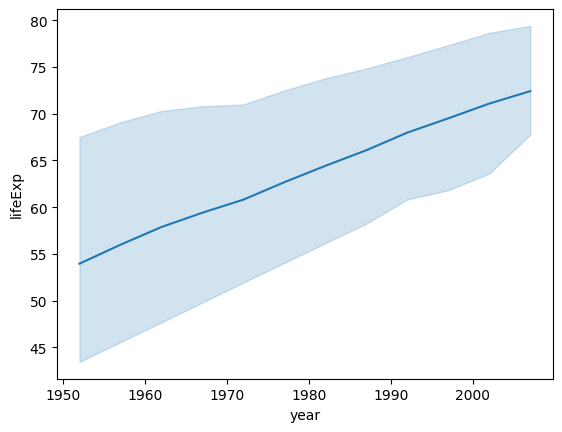

In [60]:
# axes level function
sns.lineplot(data=temp_df, x='year', y='lifeExp')

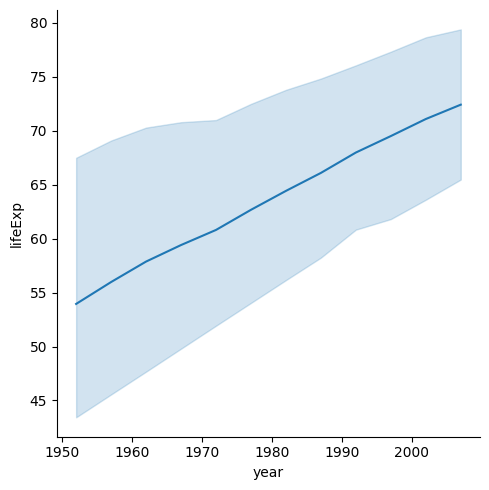

In [56]:
# using relpplot ----> figure level function
sns.relplot(data=temp_df, x='year', y='lifeExp', kind='line')


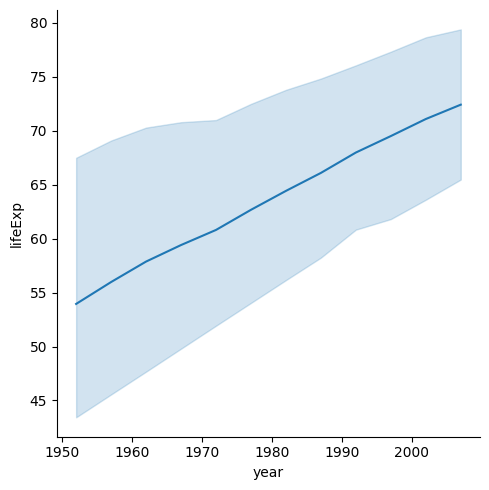

In [57]:
sns.relplot(data=temp_df,x='year',y='lifeExp',kind='line')


In [13]:
temp_df=gap[gap['country'].isin(['Germany','Pakistan','Brazil'])]

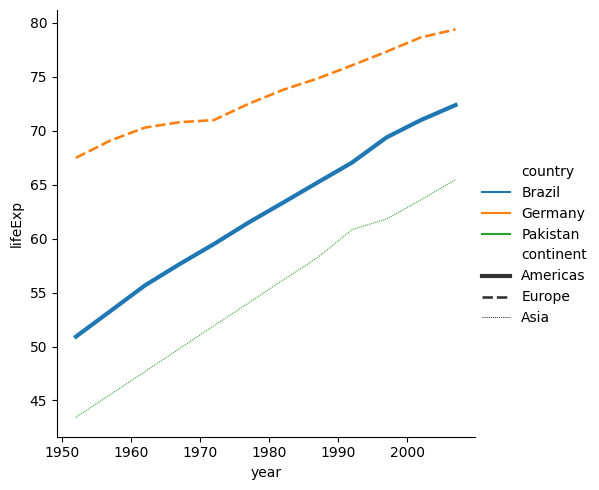

In [61]:
sns.relplot(data=temp_df,x='year',y='lifeExp',hue='country',kind='line',style='continent',size='continent')



<Axes: xlabel='year', ylabel='lifeExp'>

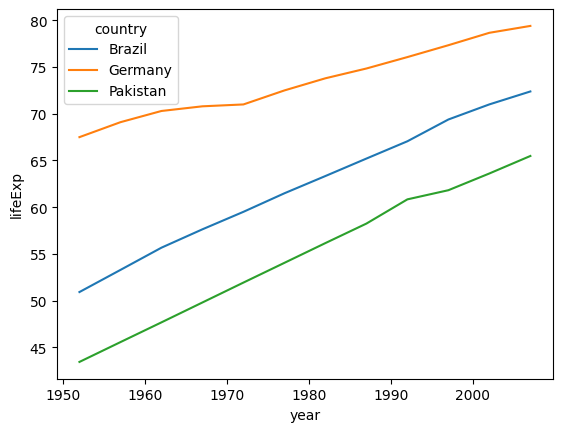

In [62]:
sns.lineplot(data=temp_df, x='year', y='lifeExp', hue='country')

In [63]:
tips.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [64]:
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

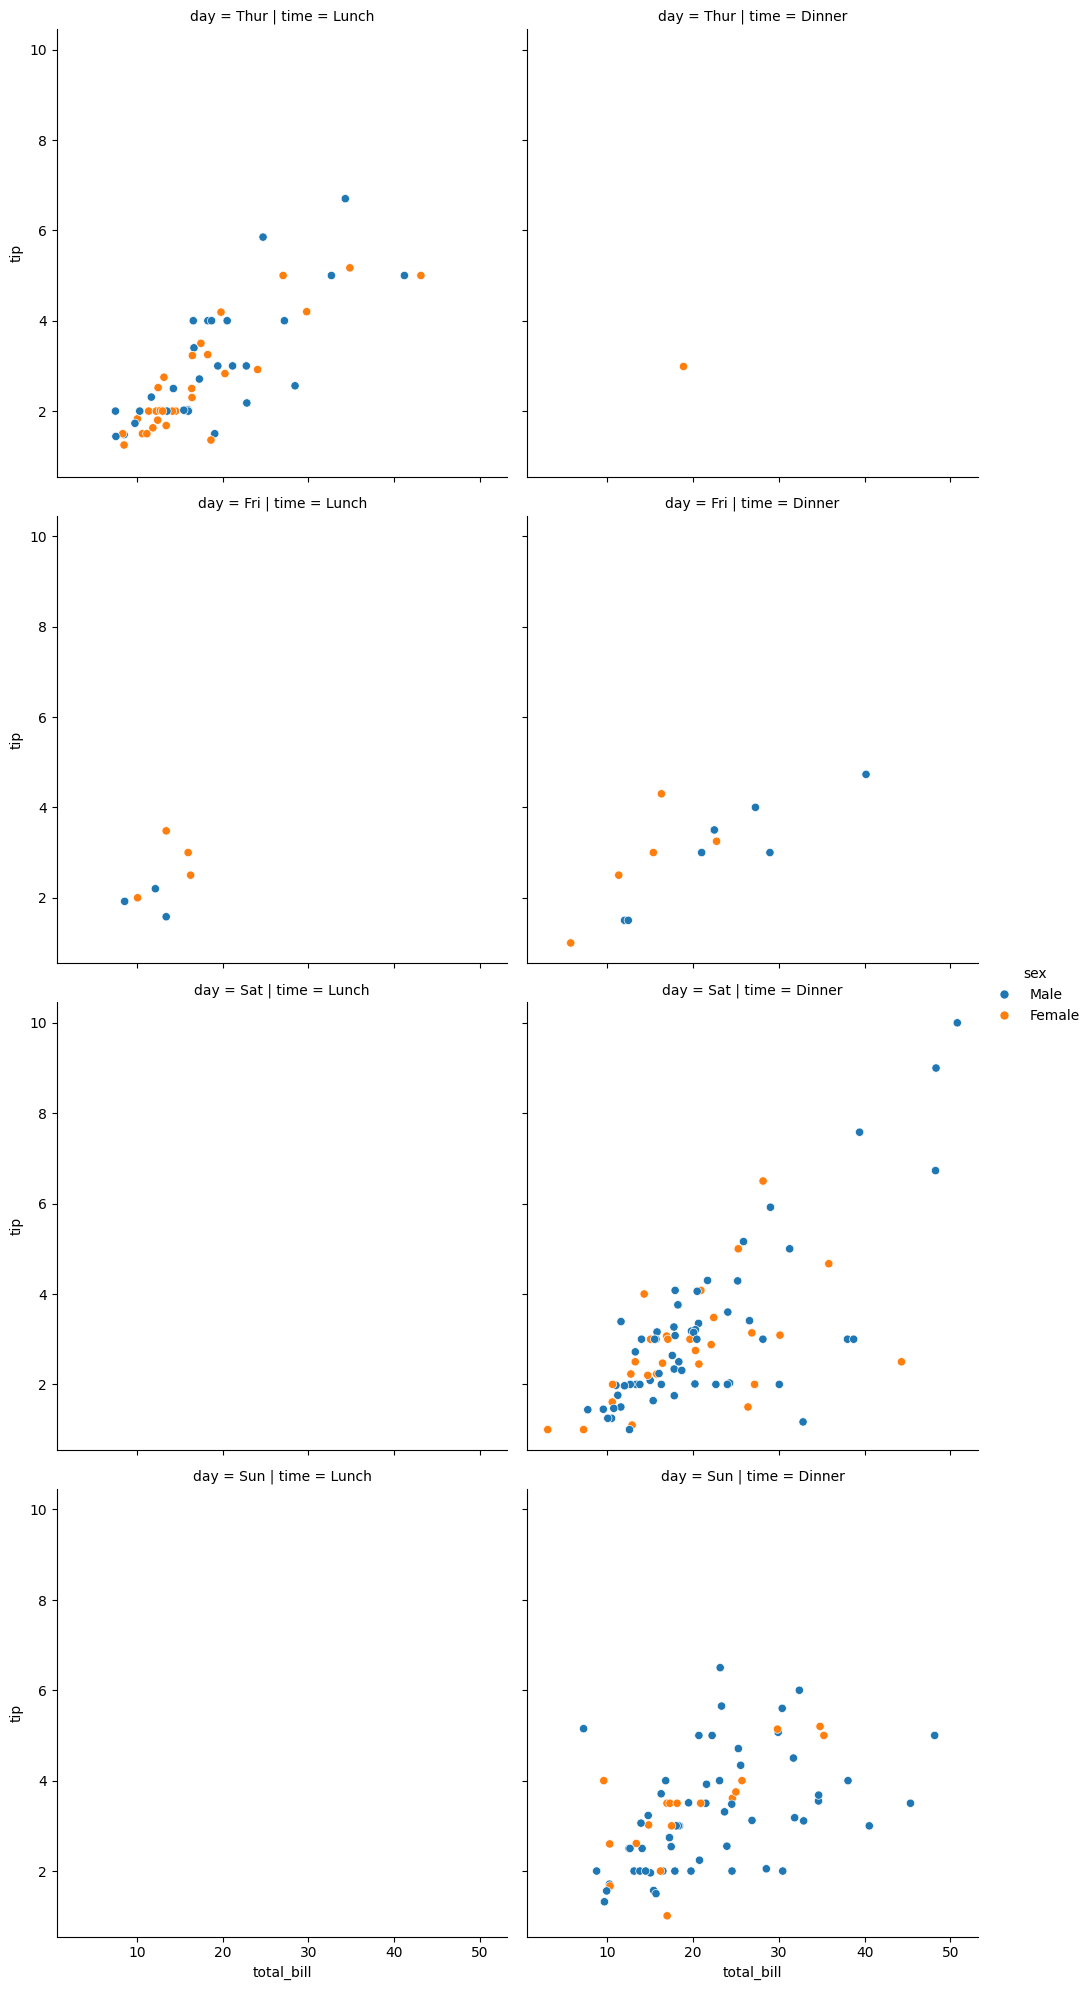

In [17]:
#multiple graph----> figure level plot
sns.relplot(data=tips,x='total_bill',y='tip',hue='sex',col='time',row='day',kind='scatter')



* Facet Plot:
is a way to create multiple subplots (small charts) based on the values of one or more categorical variables, allowing easy comparison of data across different groups.

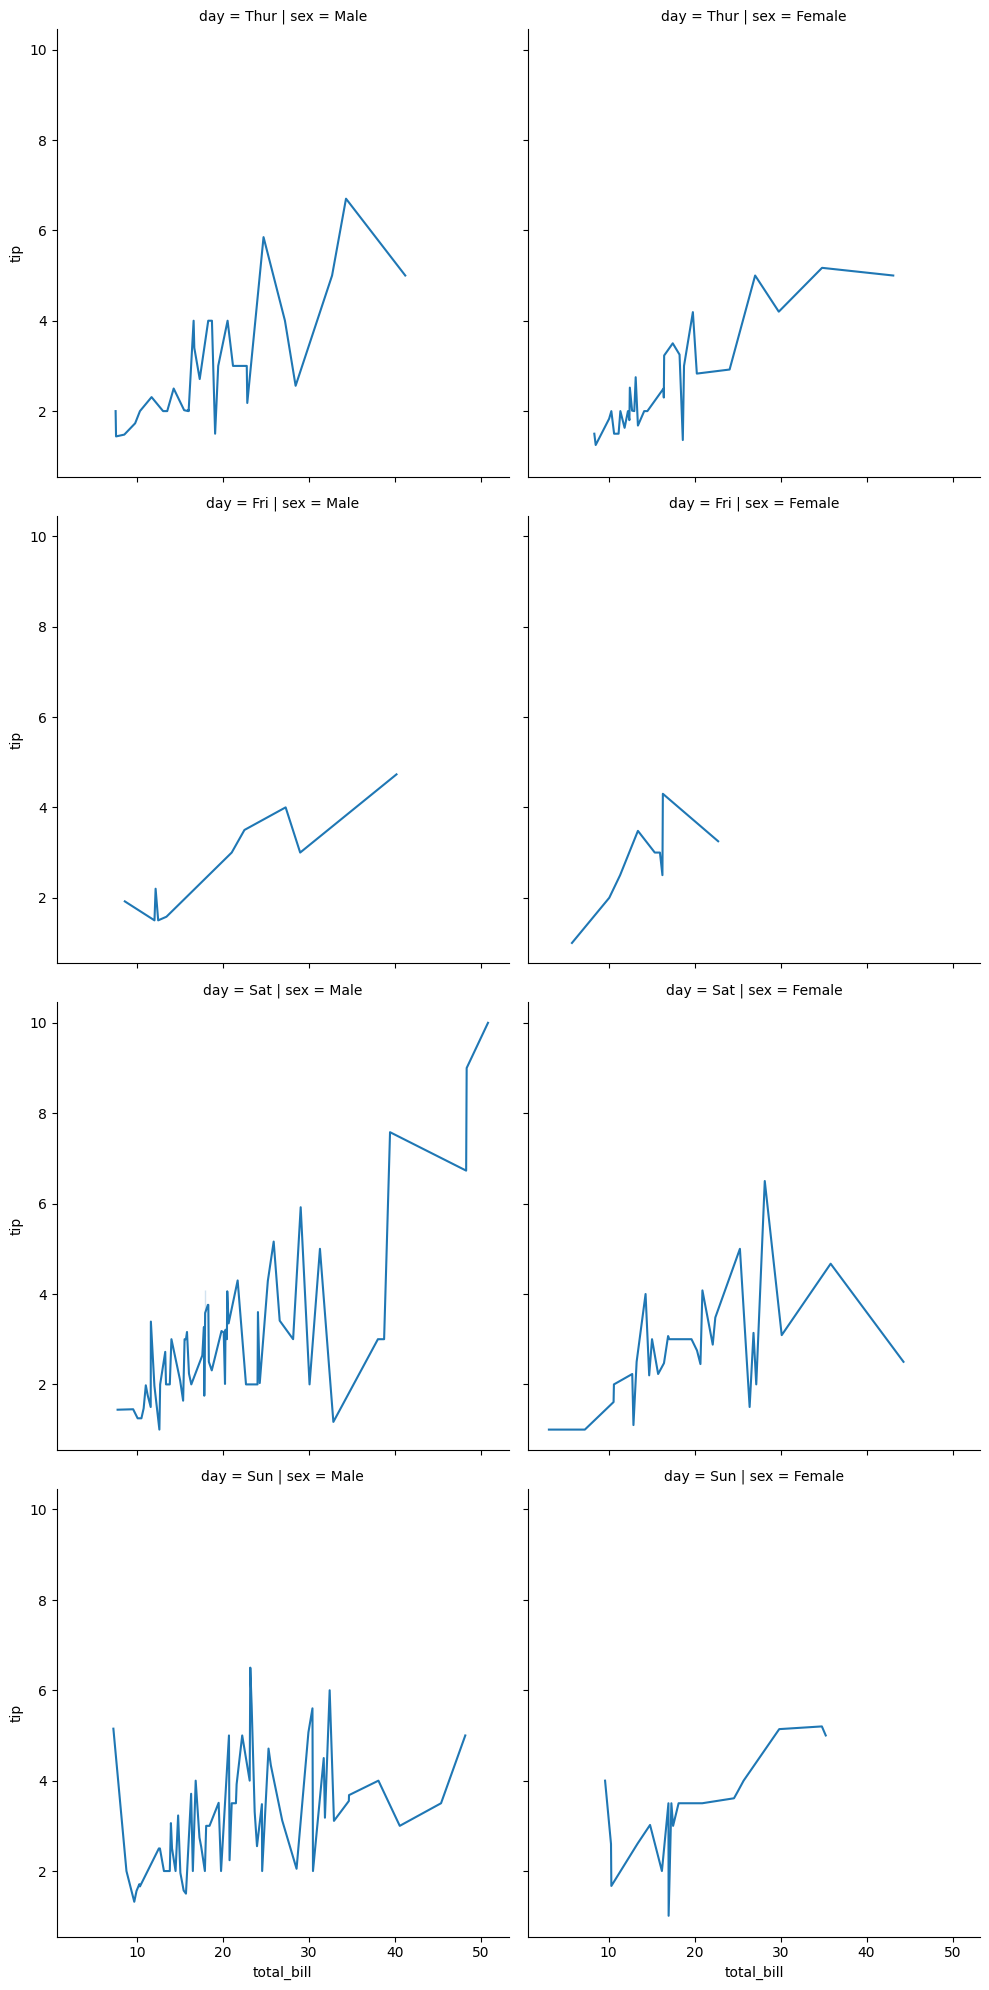

In [65]:
# facet plot -> figure level function -> work with relplot
# it will not work with scatterplot and lineplot
sns.relplot(data=tips, x='total_bill', y='tip', kind='line', col='sex', row='day')

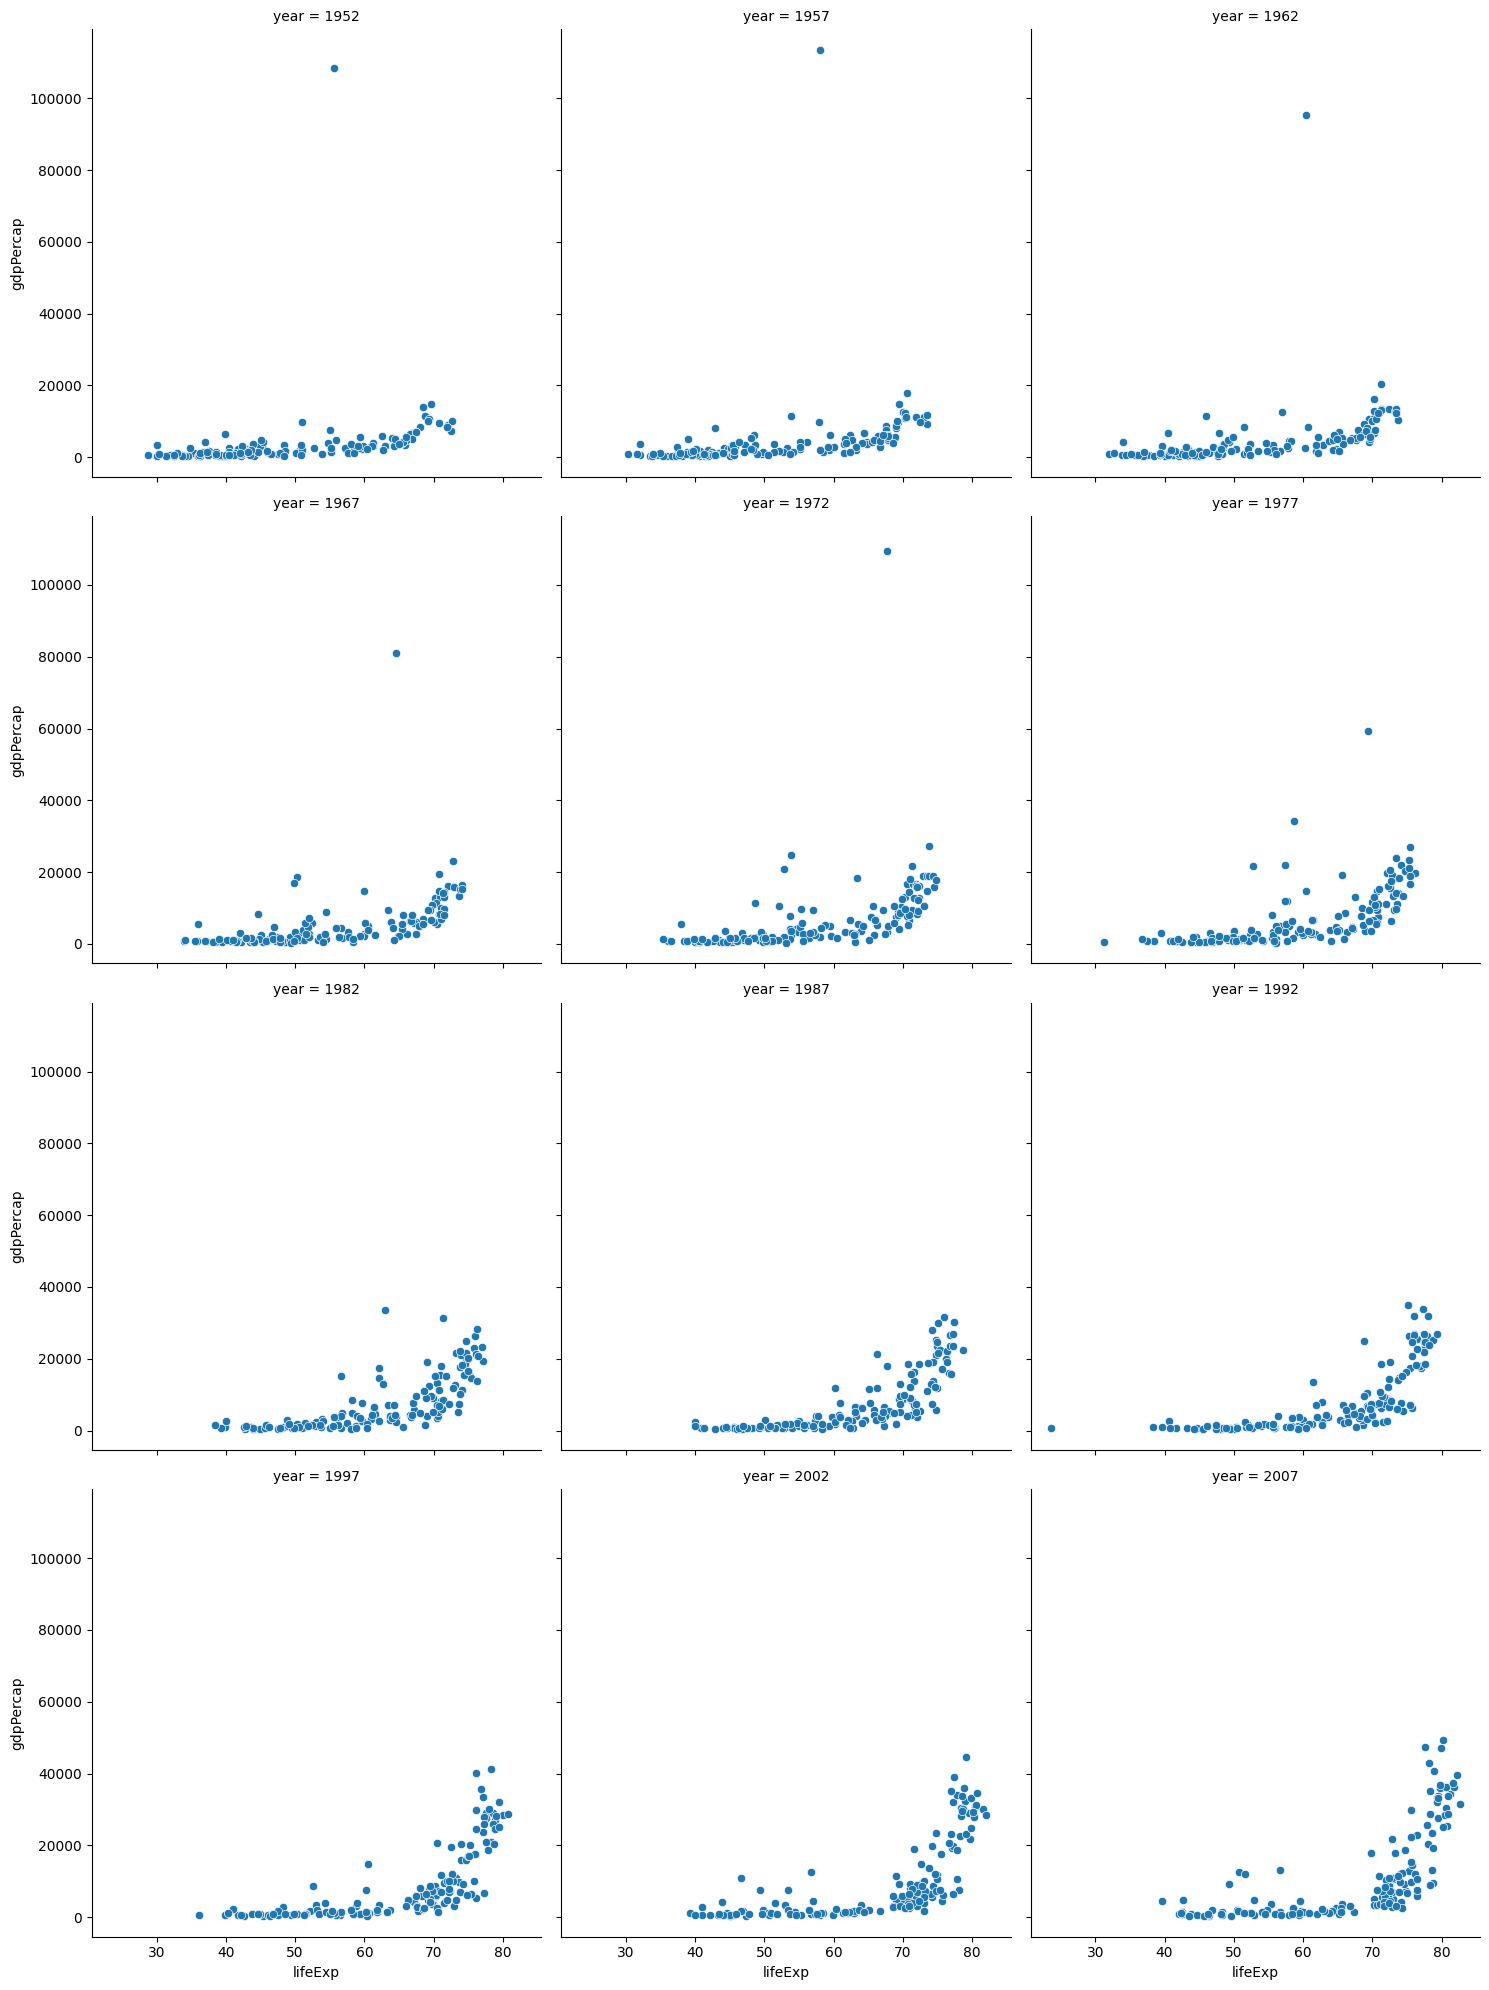

In [68]:
# col wrap ---> what amount o columns come in one line
sns.relplot(data=gap, x='lifeExp', y='gdpPercap', kind='scatter', col='year', col_wrap=3)

### 2. Distribution Plots

Distribution plots are used for univariate analysis to show how data values are distributed.
They help identify the range of observations, the central tendency (center of the data), and the overall pattern or spread of the dataset.


- histplot
- kdeplot


### Figure Leve Function ----> `displot`


In [69]:
# figure level -> displot
# axes level -> histplot -> kdeplot -> rugplot

In [18]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [19]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<Axes: xlabel='total_bill', ylabel='Count'>

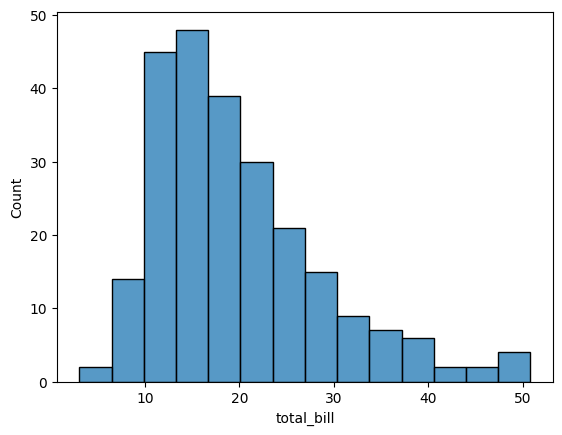

In [70]:
# plotting univariate histogram
sns.histplot(data=tips,x='total_bill')

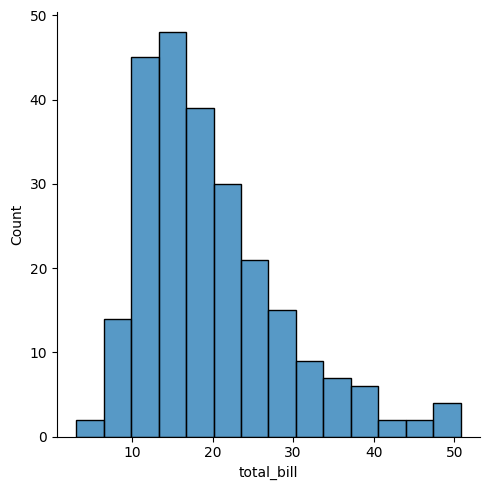

In [71]:
# figure level
sns.displot(data=tips,x='total_bill',kind='hist')

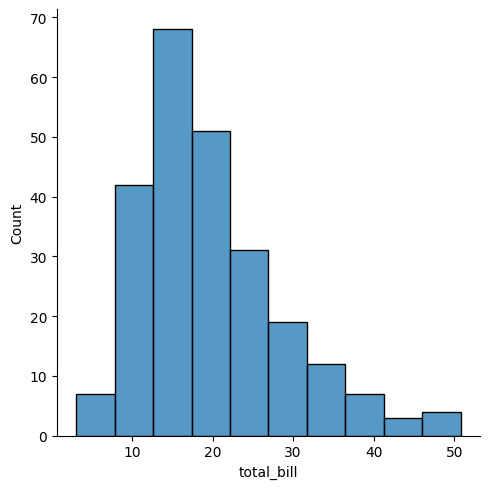

In [22]:
# bins parameter-----> break data in given number of intervals


sns.displot(data=tips,x='total_bill',kind='hist',bins=10)

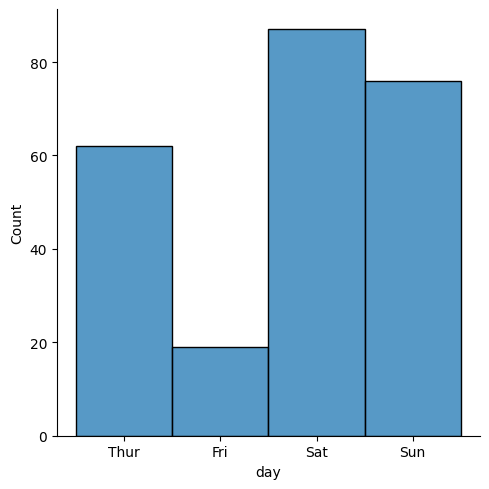

In [73]:
# It’s also possible to visualize the distribution of a categorical variable using the logic of a histogram.
# Discrete bins are automatically set for categorical variables

# countplot
sns.displot(data=tips, x='day', kind='hist')

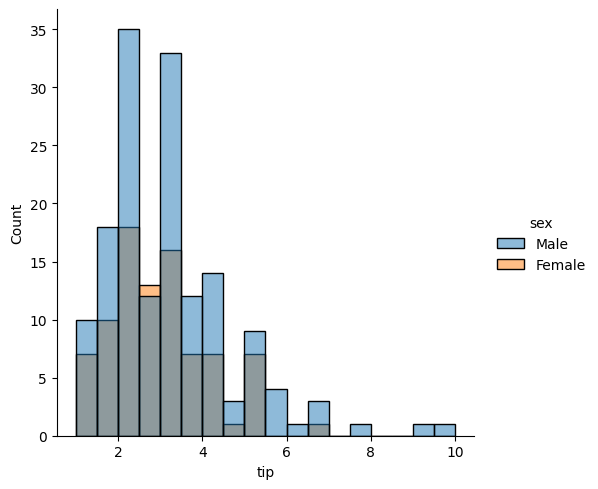

In [74]:
# hue parameter
sns.displot(data=tips, x='tip', kind='hist',hue='sex')

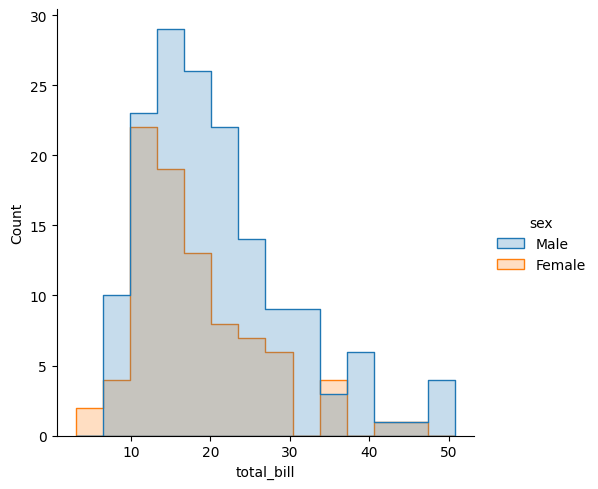

In [24]:
sns.displot(data=tips,x='total_bill',kind='hist',hue='sex',element='step')

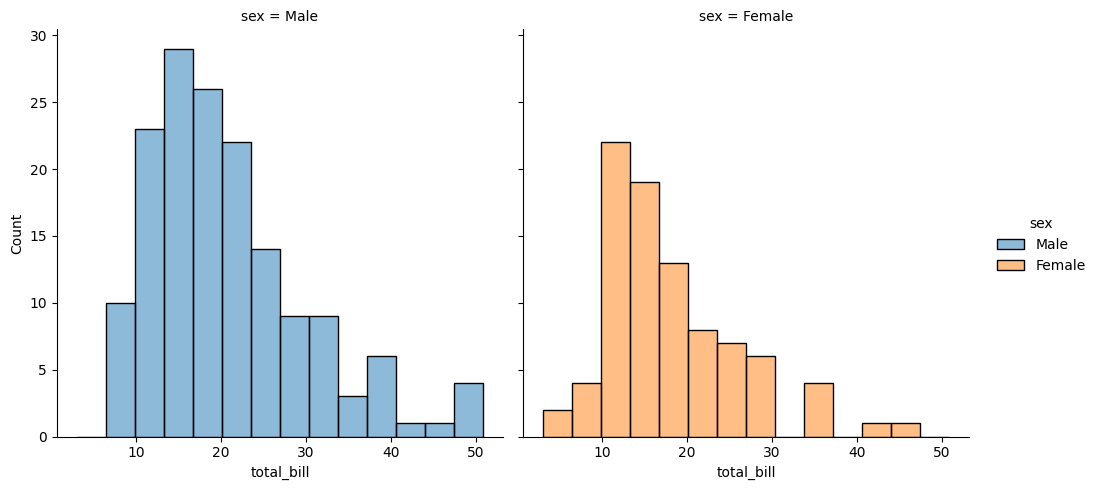

In [75]:
# faceting using col and row -> not work on histplot function because histplot is axis level

sns.displot(data=tips,x='total_bill',kind='hist',hue='sex',col='sex')

* KDE Plot:

Kernel Density Estimate Plot is used to show the probability density of a continuous variable, it displays a smooth curve that represents the distribution shape of the data.



<Axes: xlabel='total_bill', ylabel='Density'>

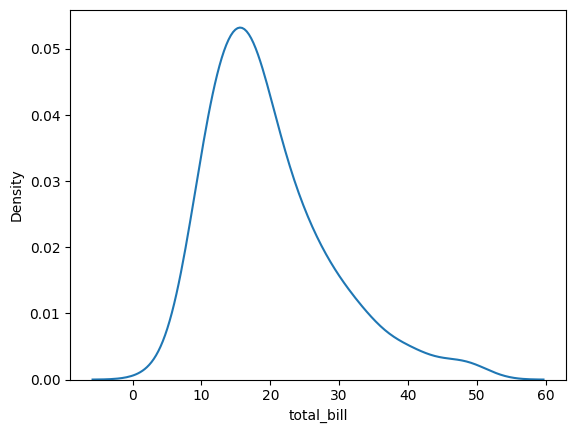

In [26]:
# KDE Plot
sns.kdeplot(data=tips,x='total_bill')

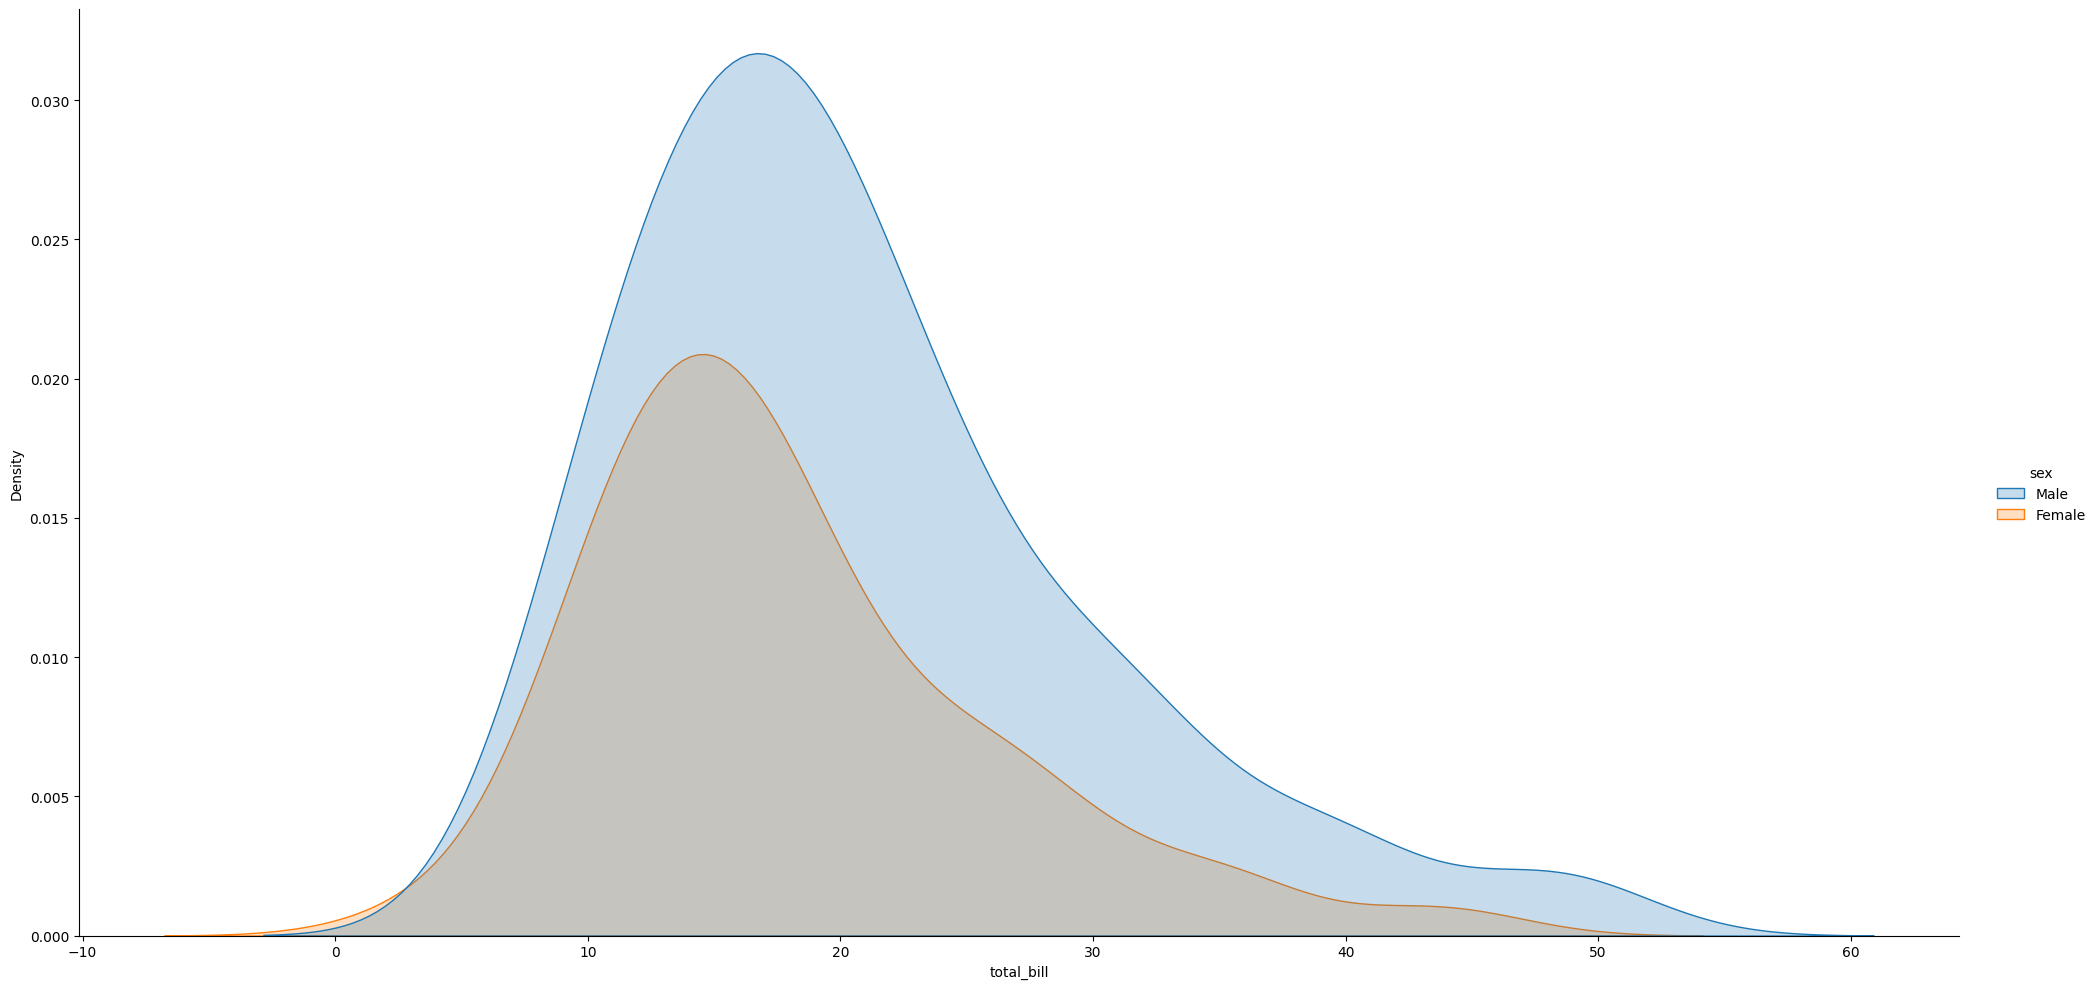

In [76]:
# hue -> fill
sns.displot(data=tips,x='total_bill',kind='kde',hue='sex',fill=True,height=10,aspect=2)

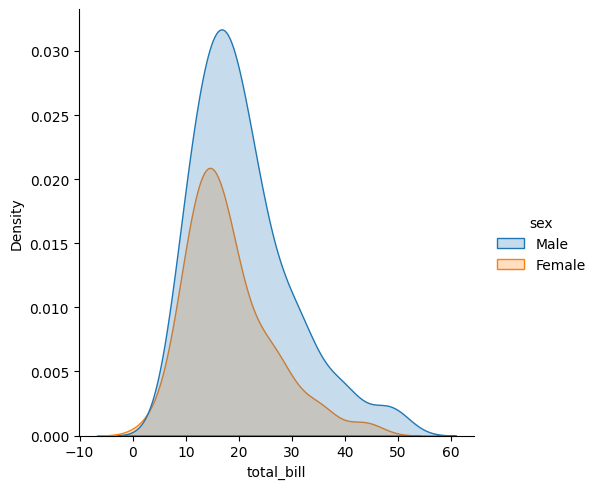

In [77]:
sns.displot(data=tips,x='total_bill',kind='kde',hue='sex',fill=True)

## 3. Categrical Plot:
used to visualize relationships between categorical and numerical variables.
They help in comparing categories and understanding how a numeric value changes across different groups.

### Categorical Scatter Plot

- Stripplot
- Swarmplot

### Categorical Distribution Plots

- Boxplot
- Violinplot

### Categorical Estimate Plot -> for central tendency

- Barplot
- Countplot

### Figure level function ---> `catplot`

<Axes: xlabel='day', ylabel='total_bill'>

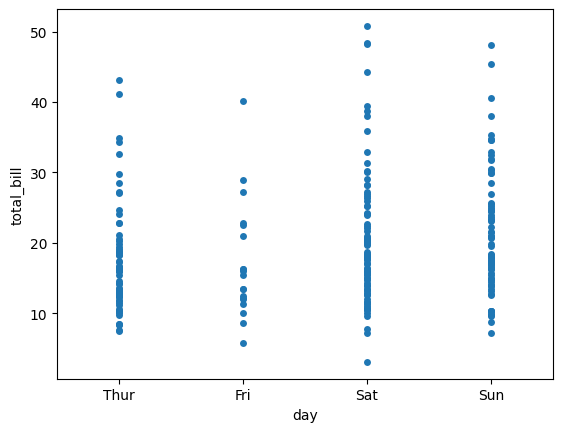

In [78]:
# strip plot
# axes level function
#jitter=True ---->  add random noise and spread the dots a little so you can see all individual points clearly.
sns.stripplot(data=tips,x='day',y='total_bill',jitter=False)

<Axes: xlabel='day', ylabel='total_bill'>

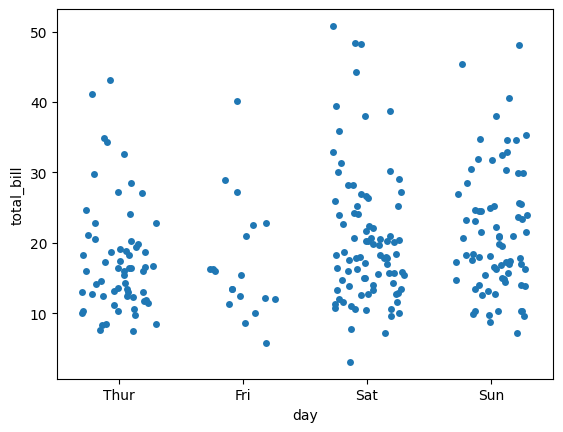

In [79]:
# using catplot
# figure level function
#you can change jitter value in catplot to add more diersification in scatter points

sns.stripplot(data=tips,x='day',y='total_bill',jitter=0.3)

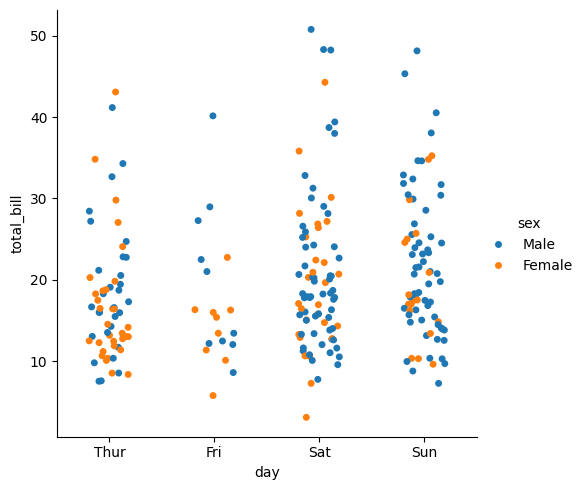

In [80]:
#hue


sns.catplot(data=tips, x='day',y='total_bill',kind='strip',jitter=0.2,hue='sex')



<Axes: xlabel='day', ylabel='total_bill'>

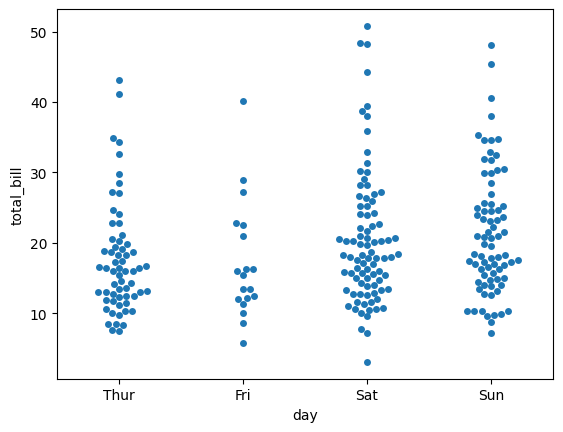

In [81]:
# swarm plot


sns.swarmplot(data=tips, x='day',y='total_bill')

<Axes: xlabel='day', ylabel='total_bill'>

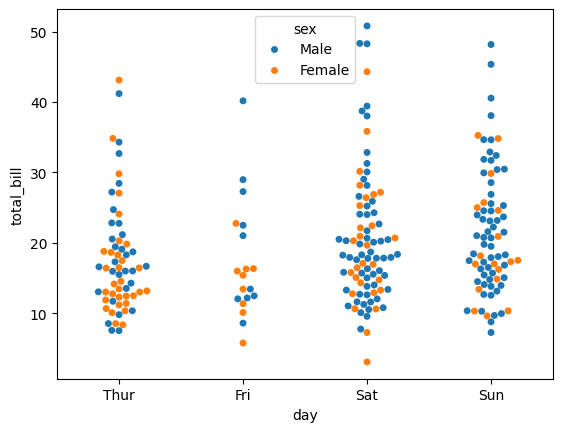

In [82]:
# swarm plot


sns.swarmplot(data=tips, x='day',y='total_bill',hue='sex')

**Note:**

 Stripplot shows data points for each category but allows overlapping, while Swarmplot avoids overlapping by adjusting positions — giving a clearer view of the distribution

##Boxplot
A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”). It can tell you about your outliers and what their values are. Boxplots can also tell you if your data is symmetrical, how tightly your data is grouped and if and how your data is skewed(assymmetrical).

In [32]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<Axes: ylabel='total_bill'>

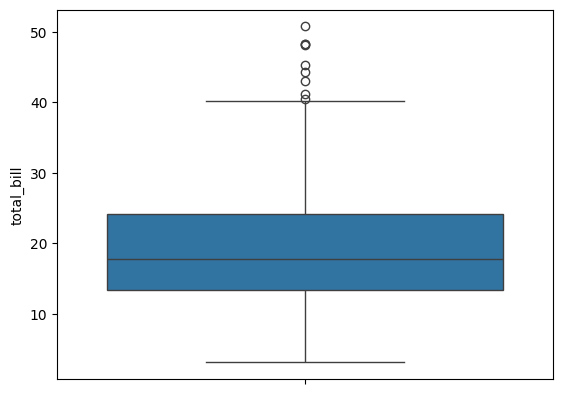

In [83]:
# single boxplot -> numerical col
sns.boxplot(data=tips,y='total_bill')

<Axes: xlabel='day', ylabel='total_bill'>

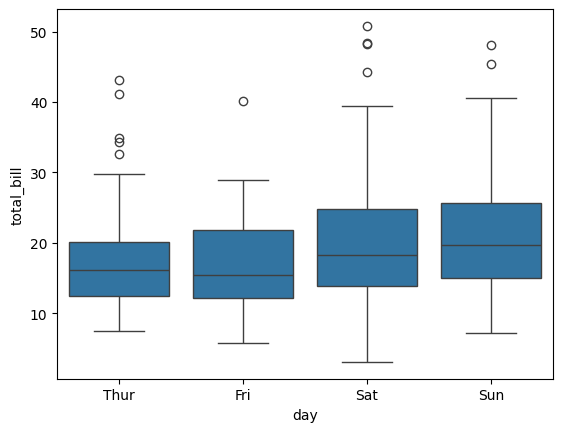

In [84]:
# Box plot
sns.boxplot(data=tips,x='day',y='total_bill')

<Axes: xlabel='day', ylabel='total_bill'>

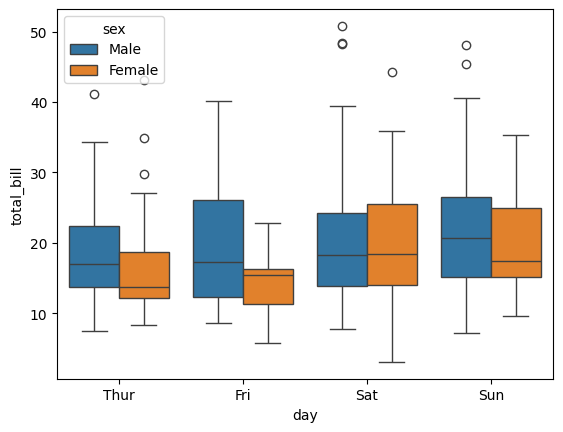

In [85]:
# hue
sns.boxplot(data=tips,x='day',y='total_bill',hue='sex')

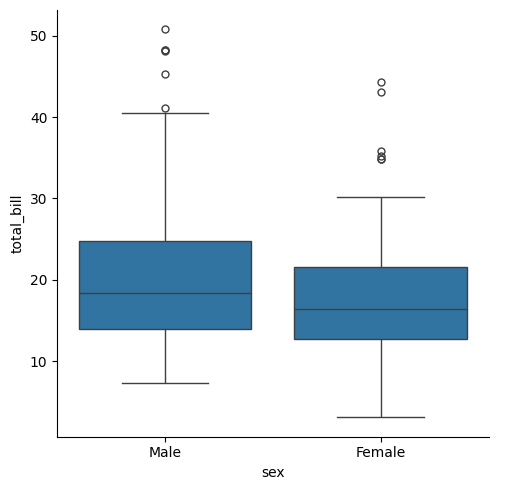

In [88]:
# Using catplot
sns.catplot(data=tips,x='sex',y='total_bill',kind='box')

In [86]:
tips.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [87]:
tips.smoker.unique()

['No', 'Yes']
Categories (2, object): ['Yes', 'No']

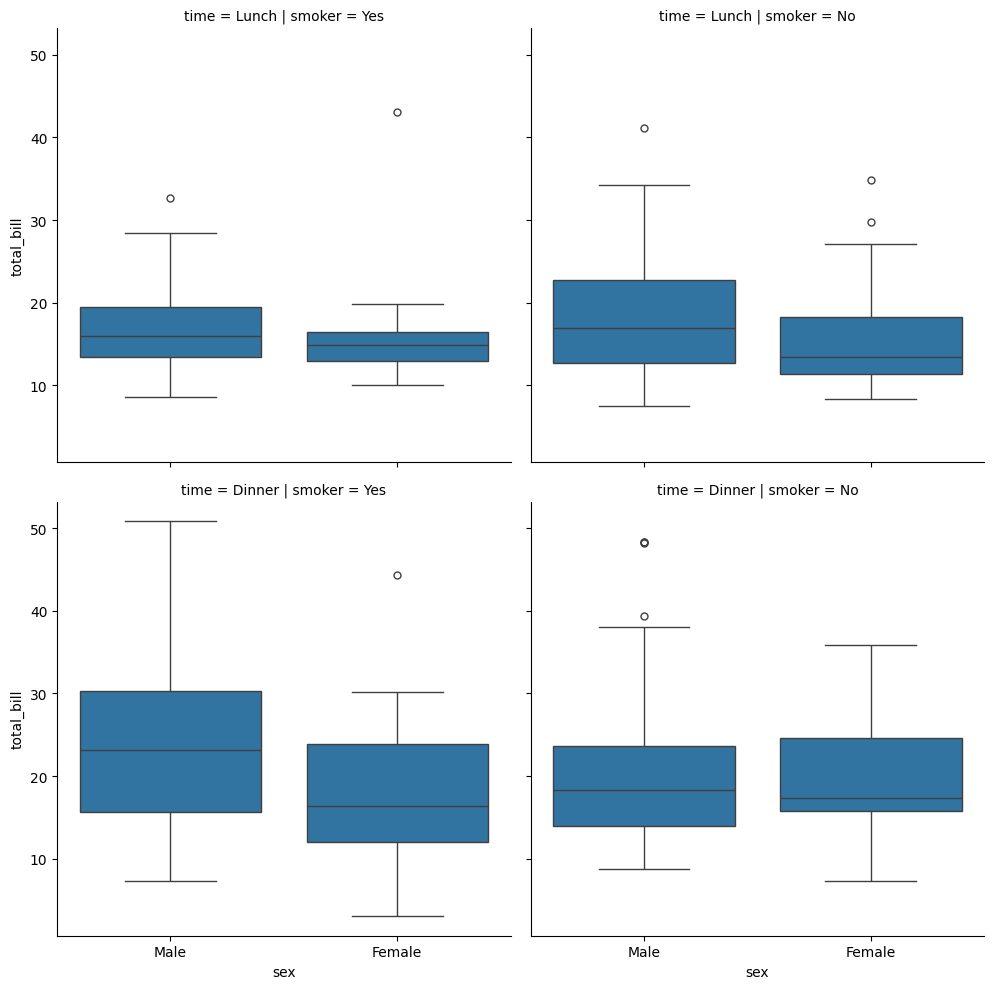

In [89]:
# faceting using catplot

sns.catplot(data=tips,x='sex',y='total_bill',kind='box',col='smoker',row='time')

### Violinplot = (Boxplot + KDEPolt)

<Axes: xlabel='day', ylabel='total_bill'>

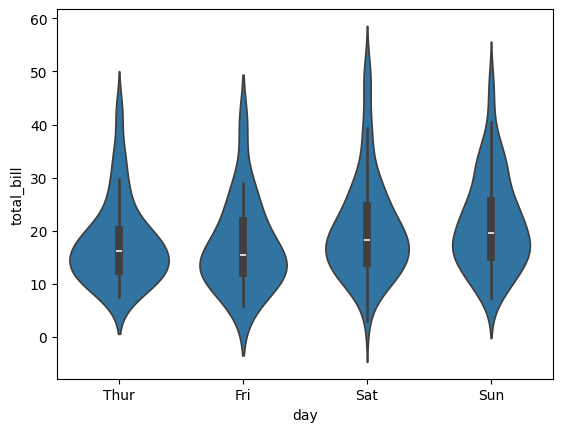

In [39]:
# violinplot
sns.violinplot(data=tips,x='day',y='total_bill')

<Axes: xlabel='day', ylabel='total_bill'>

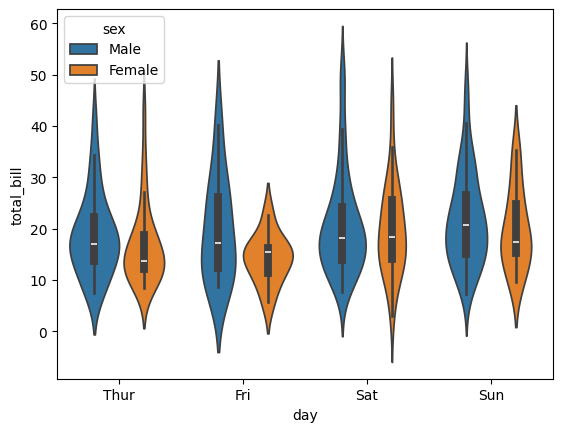

In [90]:
#hue
sns.violinplot(data=tips,x='day',y='total_bill',hue='sex')

<Axes: xlabel='day', ylabel='total_bill'>

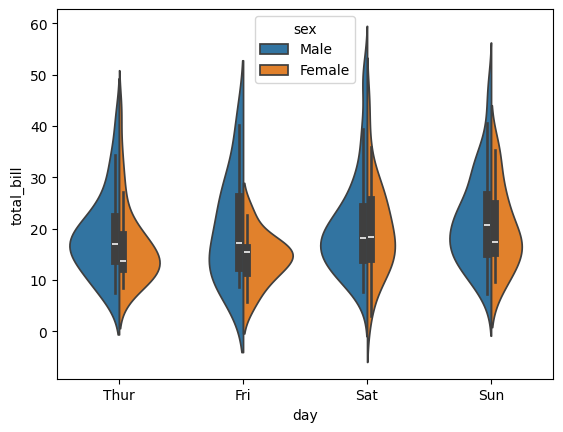

In [41]:
sns.violinplot(data=tips,x='day',y='total_bill',hue='sex',split=True)

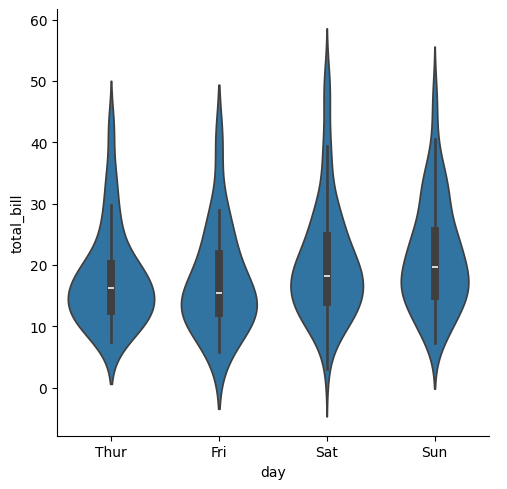

In [91]:
sns.catplot(data=tips,x='day',y='total_bill',kind='violin')

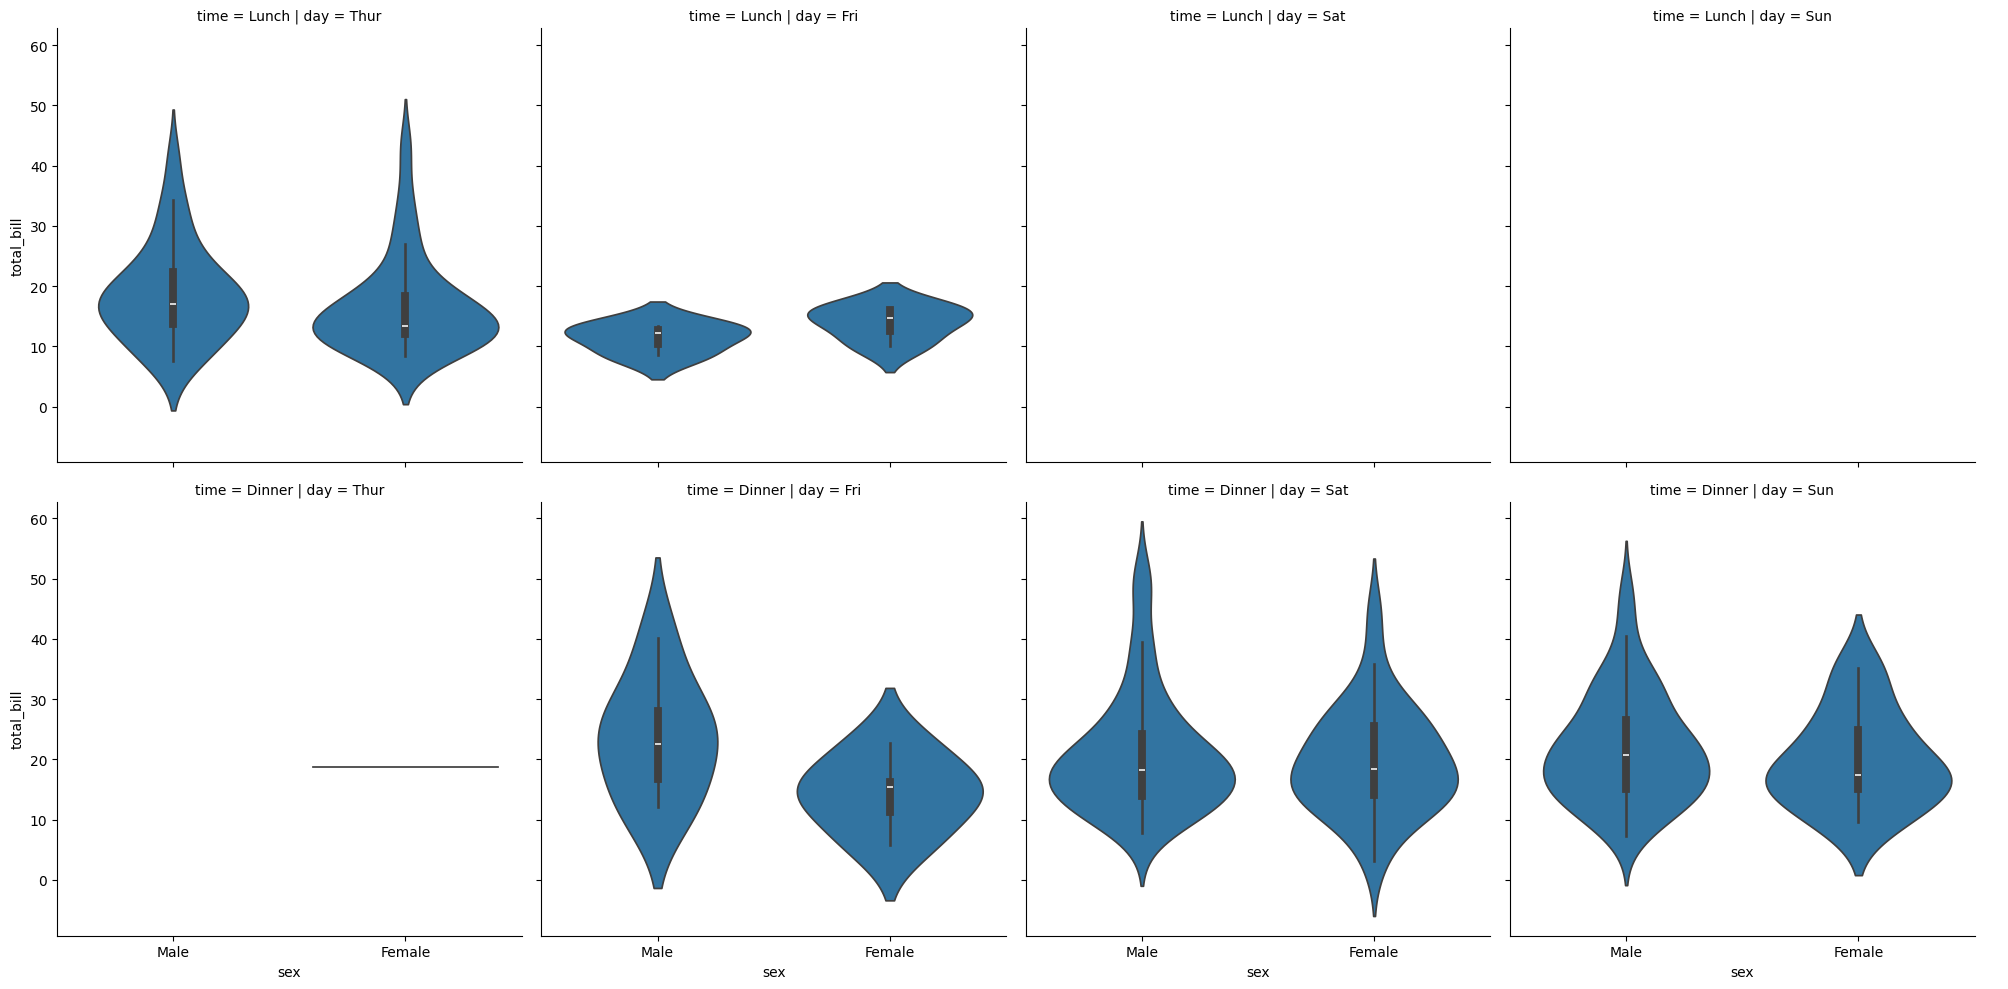

In [92]:
# figure level
sns.catplot(data=tips,x='sex',y='total_bill',kind='violin',col='day',row='time')

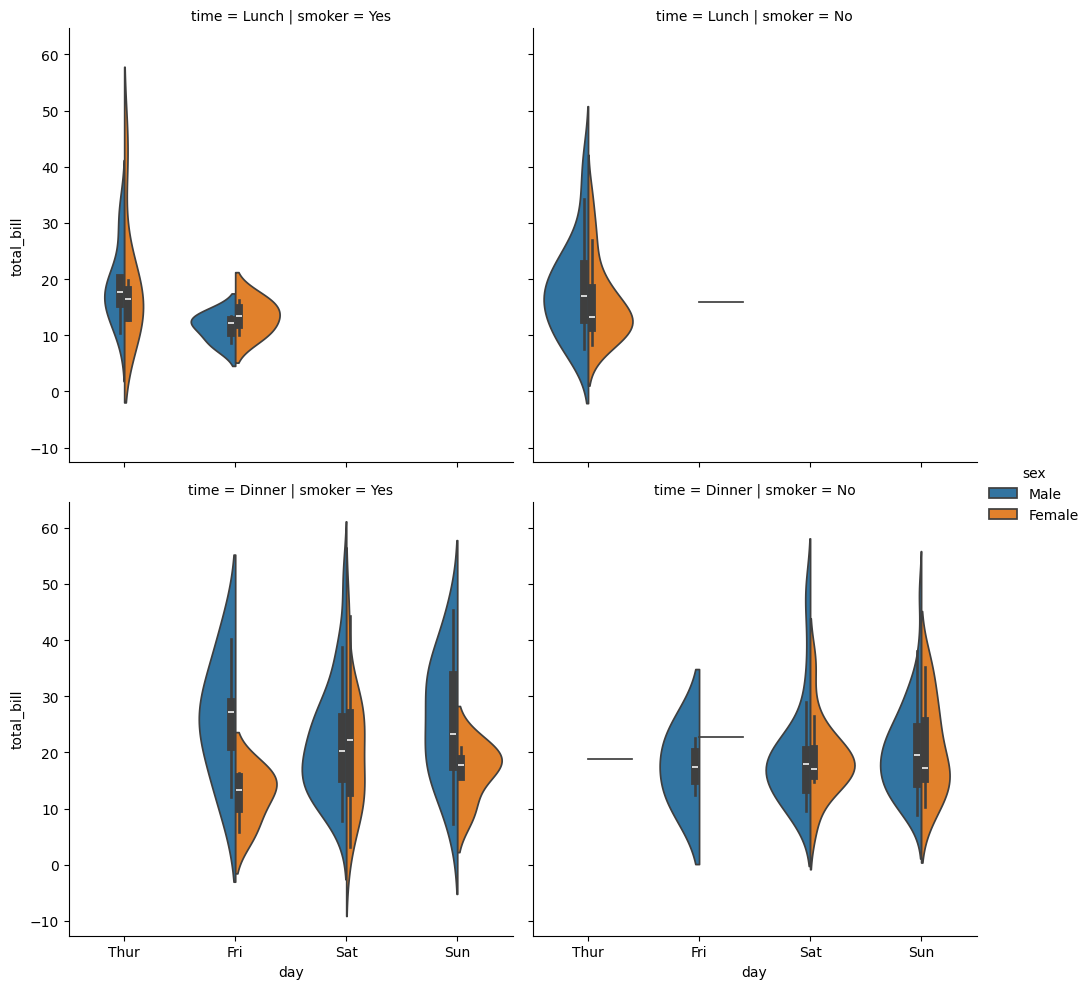

In [42]:
# figure level

sns.catplot(data=tips,x='day',y='total_bill',kind='violin',hue='sex',col='smoker',row='time',split=True)

<Axes: xlabel='sex', ylabel='total_bill'>

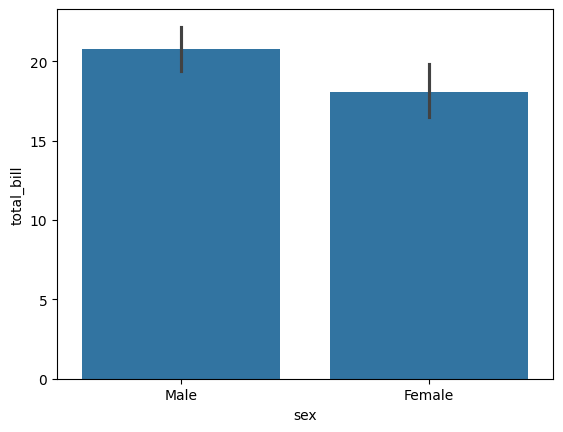

In [93]:
# barplot
sns.barplot(data=tips, x='sex', y='total_bill')

/tmp/ipython-input-930744351.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=tips,x='day',y='total_bill',ci=None)


<Axes: xlabel='day', ylabel='total_bill'>

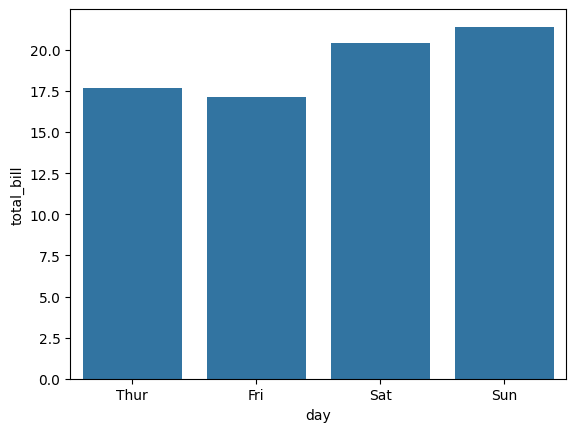

In [95]:
# ci ---> errorbar remover
sns.barplot(data=tips,x='day',y='total_bill',ci=None)

/tmp/ipython-input-2519901166.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=tips,x='sex',y='total_bill',hue='smoker',ci=None)


<Axes: xlabel='sex', ylabel='total_bill'>

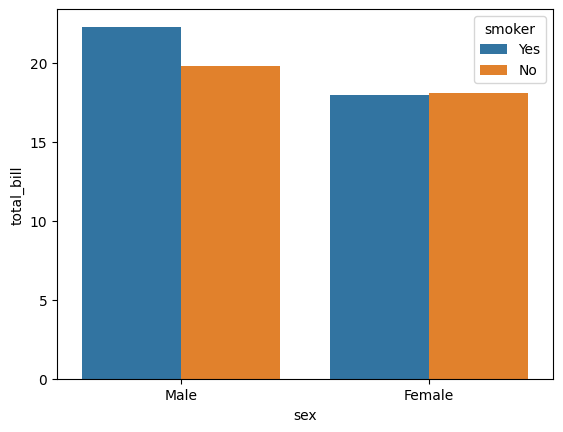

In [44]:
# barplot
sns.barplot(data=tips,x='sex',y='total_bill',hue='smoker',ci=None)

<Axes: xlabel='sex', ylabel='total_bill'>

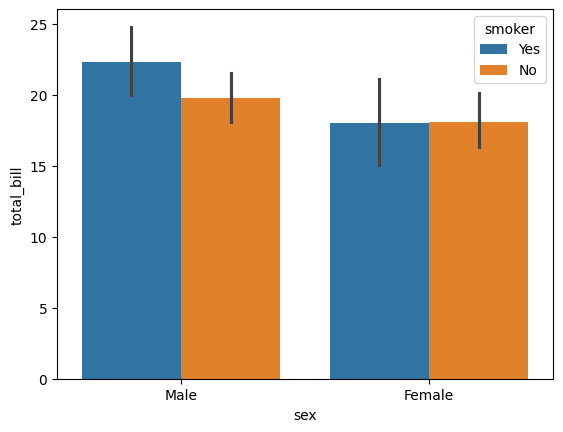

In [96]:
sns.barplot(data=tips,x='sex',y='total_bill',hue='smoker')

* Countplot:

Count Plot is a categorical plot that shows the count (frequency) of observations in each category using bars.
It is mainly used to visualize how many times each category appears in the dataset.

<Axes: xlabel='sex', ylabel='count'>

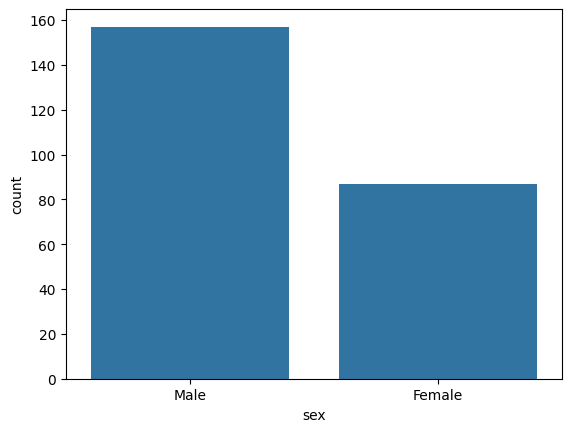

In [97]:
sns.countplot(data=tips,x='sex')

<Axes: xlabel='sex', ylabel='count'>

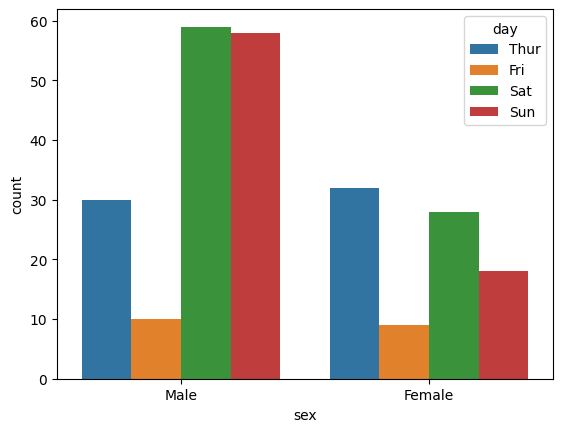

In [98]:
# countplot for each day
sns.countplot(data=tips,x='sex',hue='day')

## 4. Multiplot:

Multi Plot (or Multiple Plot) refers to displaying more than one plot or graph in a single figure or window to compare different variables or patterns side by side.

## Plotting pairwise relationship(pair plot vs pair grid)

In [46]:
iris=sns.load_dataset('iris')

In [47]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


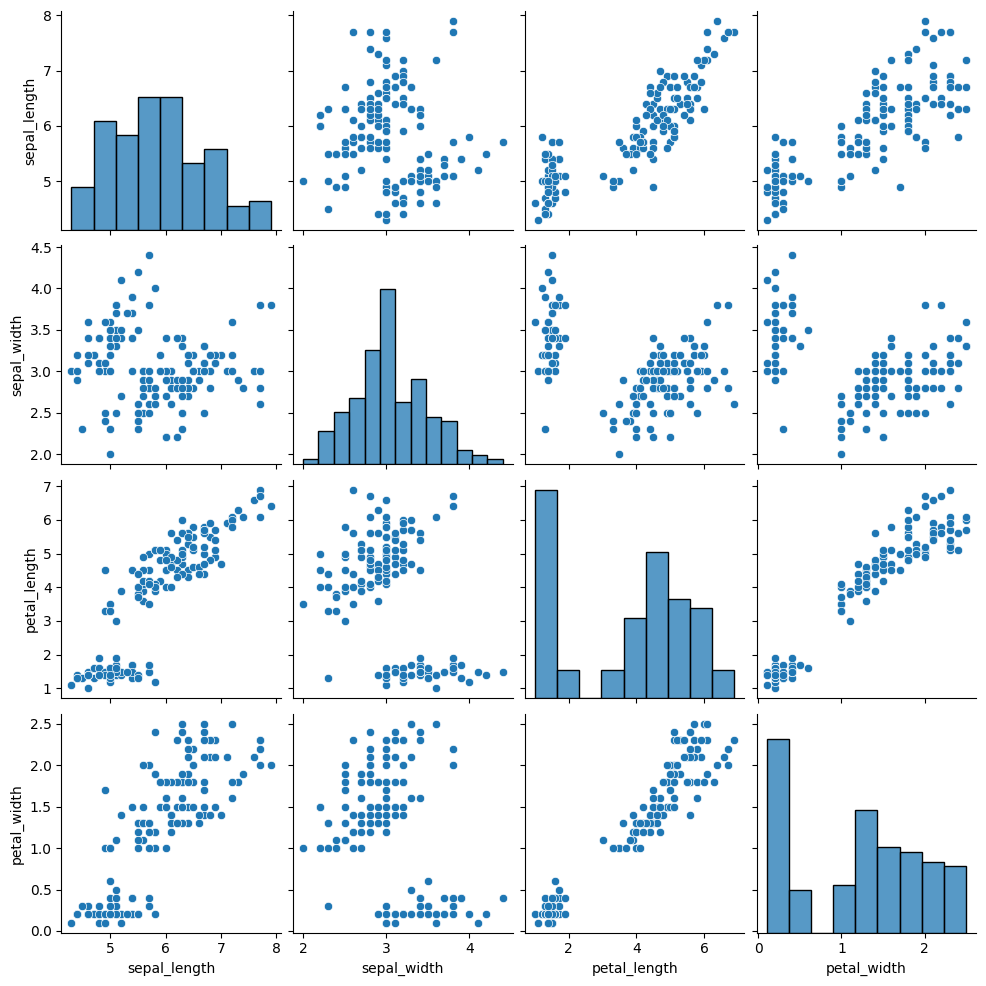

In [100]:
# pairplot ---> pairwise plotting on numerical data

sns.pairplot(data=iris)

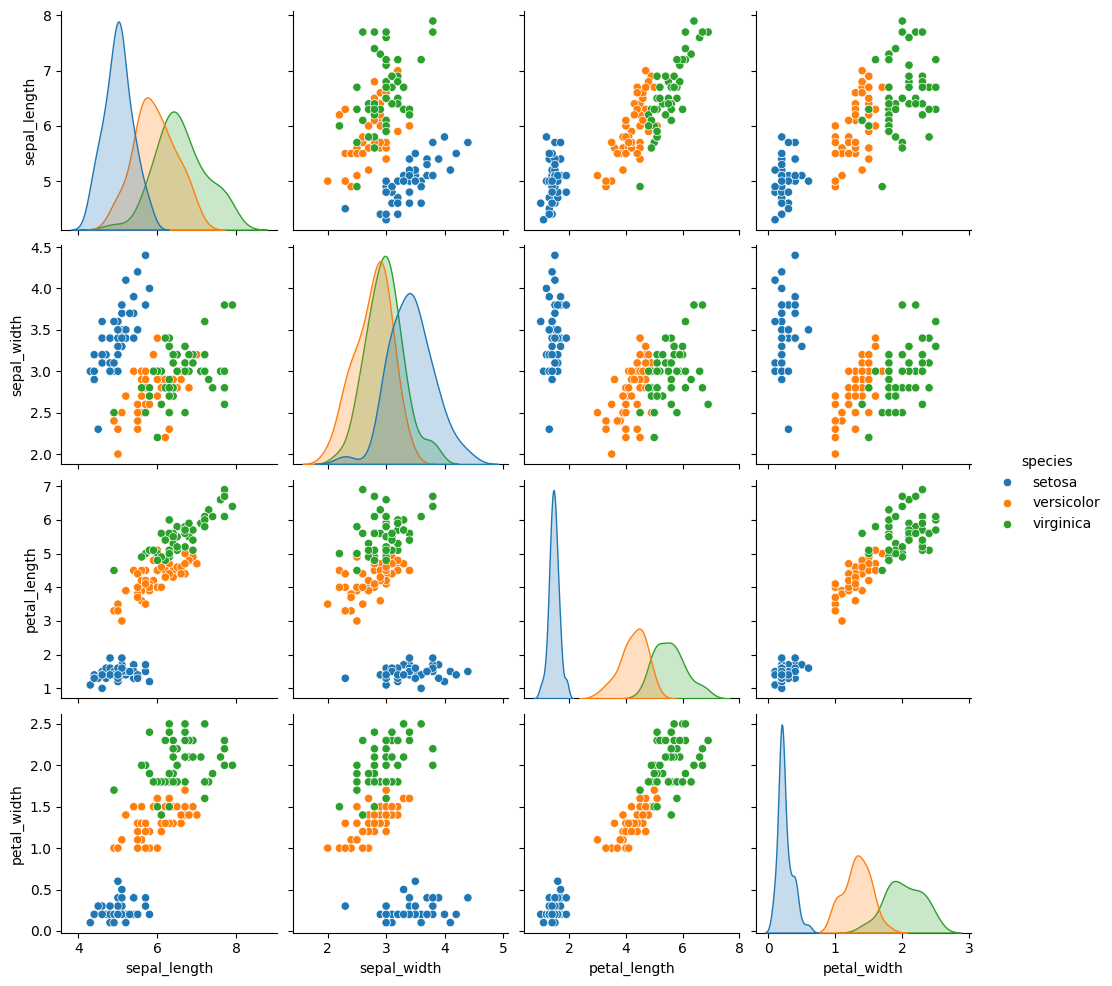

In [99]:
# pair wise plotting on nuerical data
# wen columns are same, it makes histogram or kde plot

sns.pairplot(data=iris,hue='species')

* Pair Grid

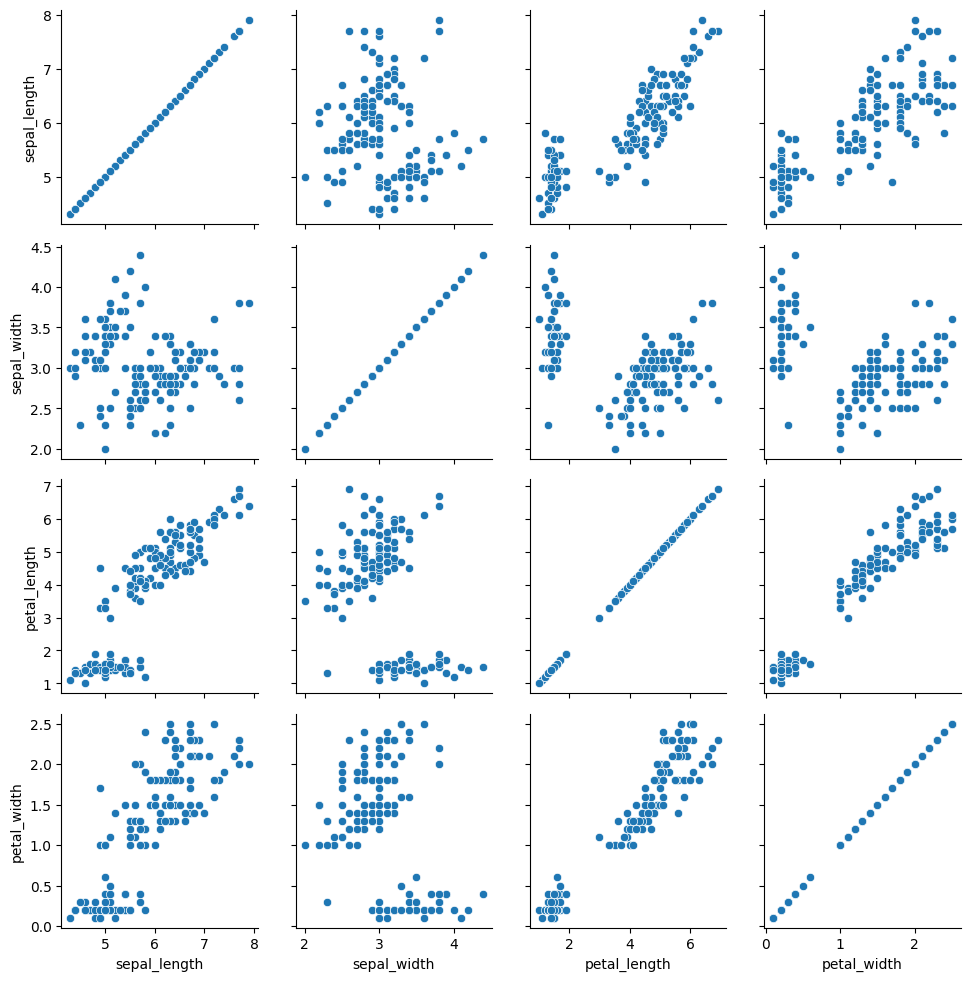

In [101]:
# pair Grid
g=sns.PairGrid(data=iris)
g.map(sns.scatterplot)


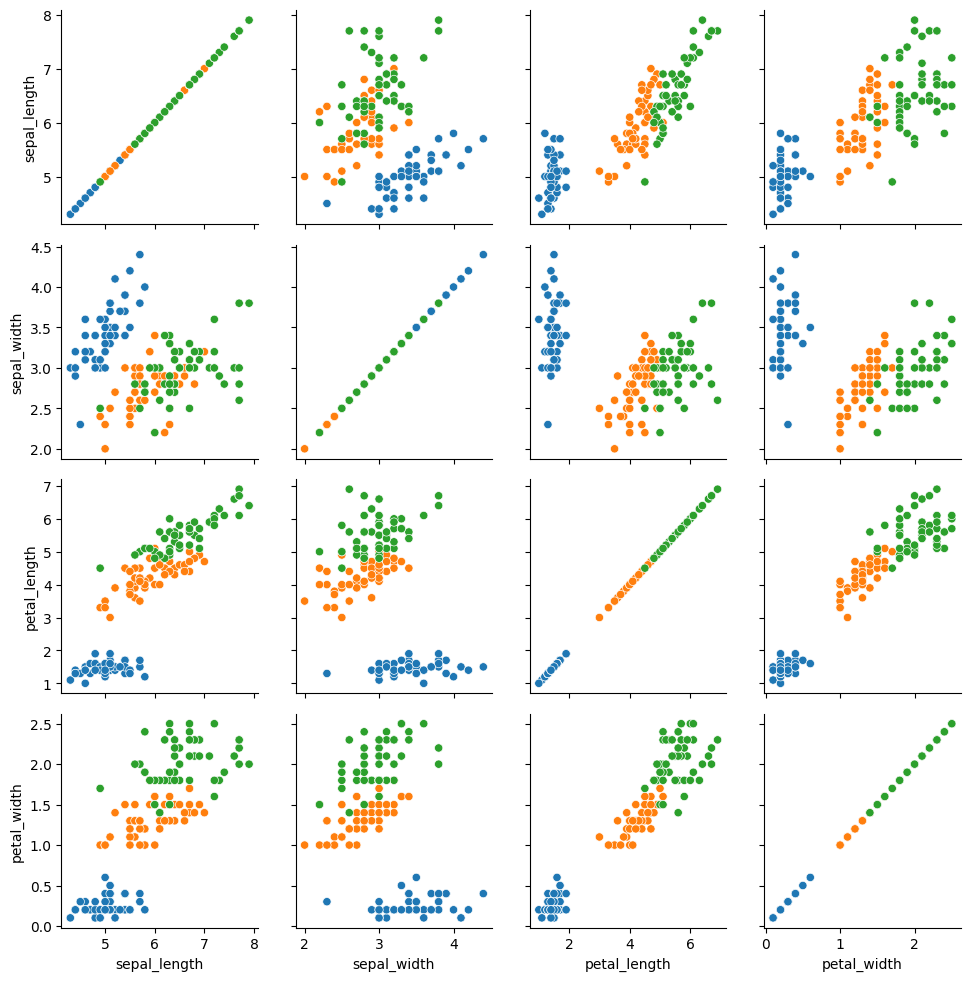

In [102]:
# pair Grid
g=sns.PairGrid(data=iris,hue='species')
g.map(sns.scatterplot)


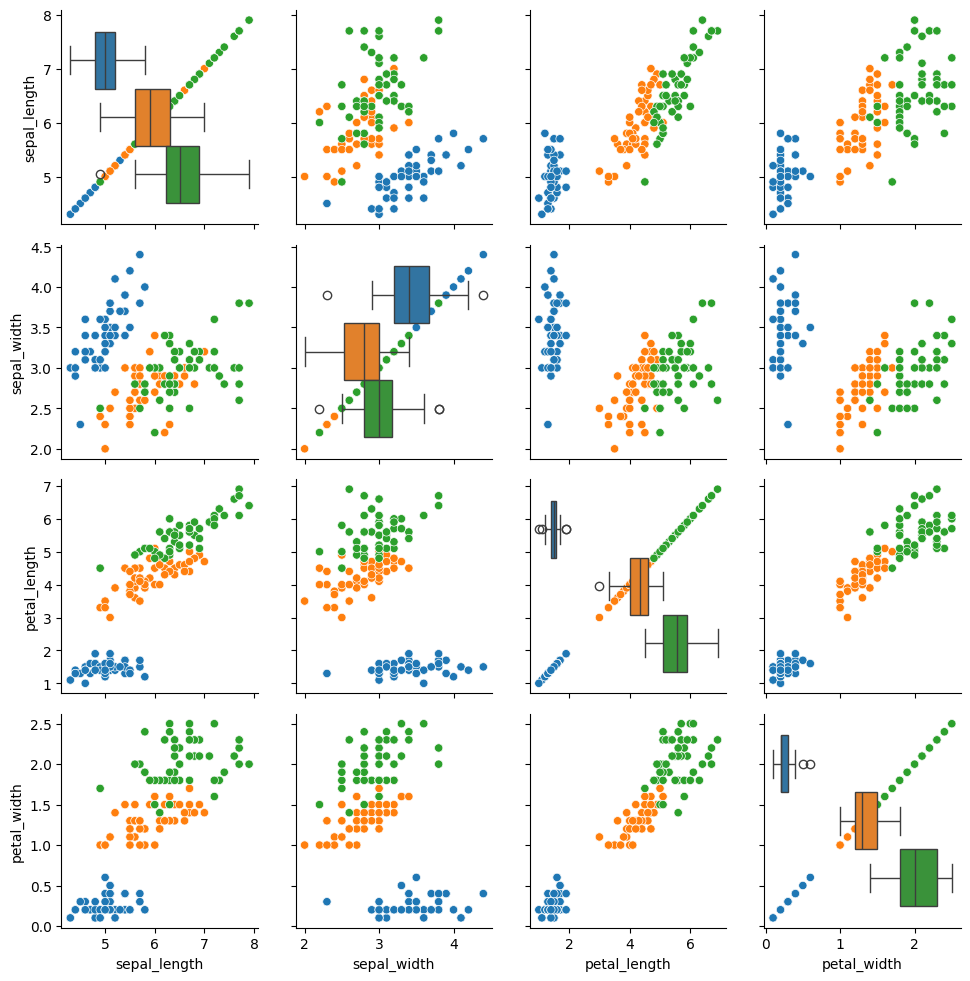

In [103]:
# map_diag -> map_offdiag

# pair Grid
g=sns.PairGrid(data=iris,hue='species')
g.map(sns.scatterplot)
g.map_diag(sns.boxplot)
g.map_offdiag(sns.scatterplot)
